# Projekt IAU  
## 1. časť - Prieskumná analýza 
### Vypracovali: Marek Adamovič, Michal Pidanič
### Číslo datasetu: 32
### Podiel práce: 50/50

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

### Načítanie a výpis ukážky datasetu - labor.csv:

In [15]:
df_labor = pd.read_csv("data/labor.csv", sep='\t')
df_labor.head()

Unnamed: 0  indicator  erytrocyty smoker     weight  trombocyty       alp  \
0           0        1.0     6.91767    yes   69.94161     6.50529  81.48900   
1           1        0.0     9.70624     no  117.24842     6.83699  43.40520   
2           2        1.0     7.88145    yes   83.97086     7.75608  38.21236   
3           3        1.0     6.63073    yes  125.82753     6.06728  88.20804   
4           4        1.0     9.09638     no   50.70530     7.90158  90.12868   

     hbver    etytr relationship          ssn  leukocyty       ast  \
0  7.30162  6.77497    separated  041-29-7959    6.17532  60.01609   
1  7.90707  7.82625      married  183-58-0483    9.41015  56.79596   
2  6.81795  5.04172      widowed  411-84-5693    7.27551  63.29051   
3  7.63231  5.57008      divoced  028-84-2760    5.75381  26.62704   
4  8.75450  6.83533      married  375-37-7701    6.77832  32.74759   

   hematokrit     er-cv  hemoglobin             name      alt  
0     7.12529  44.43192     6.01513        Blake Fox  0.88575  
1     5.22638  48.17707     8.13065      Randy Solis  6.09530  
2     5.47408  29.81102     4.51670  Phillip Miranda  1.53154  
3     6.74435  52.06123     5.92597      Mark Watson  0.58661  
4     7.86582  51.68909     6.26871   Patrick Oliver  3.33738

### Načítanie a výpis ukážky datasetu - profiles.csv:

In [16]:
df_profiles = pd.read_csv("data/profiles.csv", sep='\t')
df_profiles.head()

Unnamed: 0   race                              job blood_group  \
0           0  Asian  Accountant, chartered certified          B-   
1           1  White            IT sales professional          B-   
2           2  Asian          Communications engineer         AB-   
3           3  White                             Make         AB-   
4           4  White              Surveyor, insurance          B+   

              birthdate sex            name                   company  \
0  06/17/1921, 00:00:00   F  Patricia Brown             Rodriguez Ltd   
1            1920/06/02   F   Gina Caldwell                Hunt-Morse   
2            1987-09-28   F  Melissa Sexton                 Solis PLC   
3           10 Nov 1992   F     Tina Parker              Spencer-Gray   
4            2021-07-11   M    Robert Roman  Thomas, Brown and Davies   

           ssn                                          residence  
0  662-96-0314                   PSC 9750, Box 8721\nAPO AA 13540  
1  867-83-9688   778 Malik Pass Apt. 777\nGonzalesshire, AK 39175  
2  151-28-6496      8847 Fleming Mountains\nSanchezside, WY 64944  
3  800-81-5887      801 Andrea Row Suite 260\nFloreston, CT 93023  
4  031-36-4415  550 Joseph Overpass Apt. 184\nNew Jamesport, M...

## 1. Základný opis dát spolu s ich charakteristikami

### Počet záznamov:

In [17]:
print("\nPočet záznamov v labor.csv:", df_labor.shape[0])
print("\nPočet záznamov v profiles.csv:", df_profiles.shape[0])




Počet záznamov v labor.csv: 9922

Počet záznamov v profiles.csv: 3176


### Počet atribútov:

In [18]:
print("\nPočet atribútov v labor.csv:", df_labor.shape[1])
print("\nPočet atribútov v profiles.csv:", df_profiles.shape[1])


Počet atribútov v labor.csv: 18

Počet atribútov v profiles.csv: 10


### Typy atribútov - labor.csv:

In [19]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9922 entries, 0 to 9921
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9922 non-null   int64  
 1   indicator     9922 non-null   float64
 2   erytrocyty    9892 non-null   float64
 3   smoker        9922 non-null   object 
 4   weight        9922 non-null   float64
 5   trombocyty    9893 non-null   float64
 6   alp           9893 non-null   float64
 7   hbver         9893 non-null   float64
 8   etytr         9893 non-null   float64
 9   relationship  9922 non-null   object 
 10  ssn           9922 non-null   object 
 11  leukocyty     9893 non-null   float64
 12  ast           9893 non-null   float64
 13  hematokrit    9892 non-null   float64
 14  er-cv         9893 non-null   float64
 15  hemoglobin    9893 non-null   float64
 16  name          9922 non-null   object 
 17  alt           9893 non-null   float64
dtypes: float64(13), int64(1), ob

Zistili sme, že dataset labor.csv je zložený z atribútov typu:
- 1x int
- 13x float
- 4x object

### Typy atribútov - profiles.csv:

In [20]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3176 non-null   int64 
 1   race         3176 non-null   object
 2   job          3176 non-null   object
 3   blood_group  3176 non-null   object
 4   birthdate    3176 non-null   object
 5   sex          3176 non-null   object
 6   name         3176 non-null   object
 7   company      3176 non-null   object
 8   ssn          3176 non-null   object
 9   residence    3176 non-null   object
dtypes: int64(1), object(9)
memory usage: 248.2+ KB


Zistili sme, že dataset profiles.csv je zložený z atribútov typu:
- 1x int
- 9x object

### Distribúcie

- v distribúciach významných atribútov sme hľadali atribúty, ktoré majú distribúciu podobnú normálnemu rozdeleniu
- pre testovanie tejto normality sme atribúty otestovali Shapiro testom

In [21]:
alpha = 0.05
test_value = df_labor["erytrocyty"].dropna().to_numpy()
test_result = shapiro(test_value)
print(test_result)
if test_result.pvalue > alpha:
    print("Normálna distribúcia")
else:
    print("Iná distribúcia")

ShapiroResult(statistic=0.9786995053291321, pvalue=6.404450377264099e-36)
Iná distribúcia


/Users/michal/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Keďže p < 0.05 nejedná sa o normálnu distribúciu.

<AxesSubplot:xlabel='erytrocyty'>

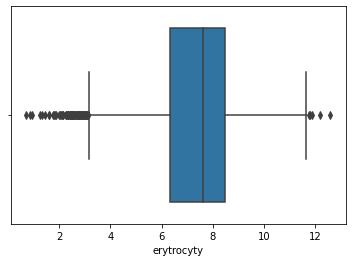

In [22]:
sns.boxplot(data=df_labor, x="erytrocyty")

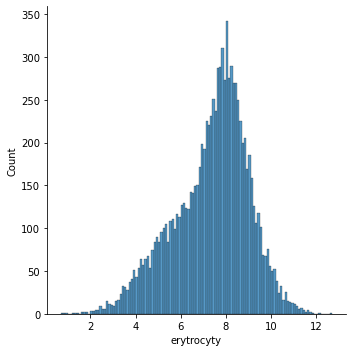

In [23]:
sns.displot(df_labor["erytrocyty"],  binwidth=0.1)

Na graforch vyššie môžeme vidieť distribúciu atribútu erytrocyty. Distribúcia je mierne pozitívne zošikmená a nejedná sa o normálnu distribúciu ako sme si už dokázali v Shapiro teste. Štandardná odchýlka je relatívne malá, čo znamená, väčšina hodnôt sa nachádza blízko priemernej hodnoty.

In [24]:
alpha = 0.05
test_value = df_labor["weight"].dropna().to_numpy()
test_result = shapiro(test_value)
print(test_result)
if test_result.pvalue > alpha:
    print("Normálna distribúcia")
else:
    print("Iná distribúcia")

ShapiroResult(statistic=0.9998617172241211, pvalue=0.8455379009246826)
Normálna distribúcia


/Users/michal/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Keďže p > 0.05 jedná sa o normálnu distribúciu.

<AxesSubplot:xlabel='weight'>

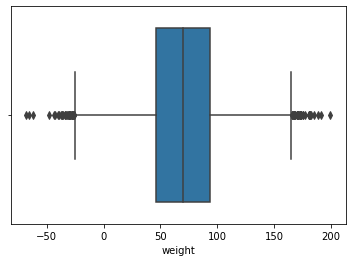

In [25]:
sns.boxplot(data=df_labor, x="weight")

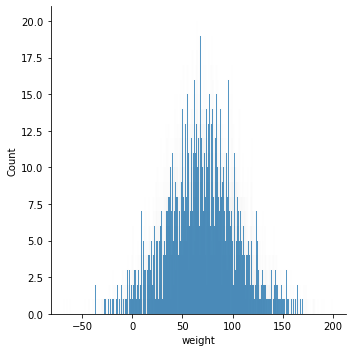

In [26]:
sns.displot(df_labor["weight"],  binwidth=0.1)

Pri atribúte weight sa podľa Shapiro testu aj podľa grafu jedná o normálnu distribúciu, avšak ako si môžeme všimnúť dáta v datasete obsahujú skreslené a nesprávne informácie = predpokladáme, že človek nemôže mať zápornú váhu.

In [27]:
alpha = 0.05
test_value = df_labor["hematokrit"].dropna().to_numpy()
test_result = shapiro(test_value)
print(test_result)
if test_result.pvalue > alpha:
    print("Normálna distribúcia")
else:
    print("Iná distribúcia")

ShapiroResult(statistic=0.999786913394928, pvalue=0.44710859656333923)
Normálna distribúcia


/Users/michal/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Výsledok Shapiro testu pre atribút hematokrit ukázal, že distribúcia bude znovu normálna, pretože p > 0.05

<AxesSubplot:xlabel='hematokrit'>

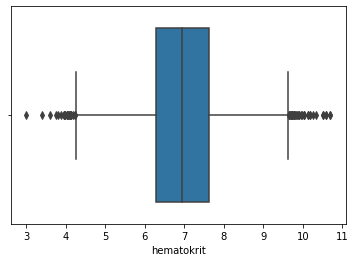

In [28]:
sns.boxplot(data=df_labor, x="hematokrit")

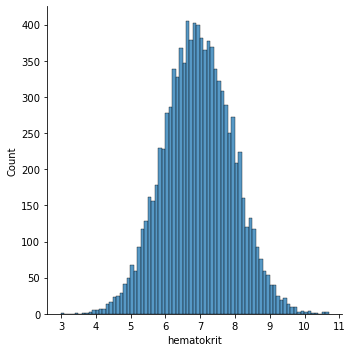

In [29]:
sns.displot(df_labor["hematokrit"],  binwidth=0.1)

Na grafoch pre zobrazenie distribúcie hodnôt atribútu hematokrit, môžeme pozorovať ukákážkovú normálnu distribúciu s relatívne malou štandardnou odchýlkou.

### Deskriptívne štatistiky - labor.csv:

In [30]:
df_labor.describe()

Unnamed: 0    indicator   erytrocyty       weight   trombocyty  \
count  9922.000000  9922.000000  9892.000000  9922.000000  9893.000000   
mean   4960.500000     0.643923     7.354813    70.033130     6.929616   
std    2864.379019     0.478863     1.655995    35.360537     1.010643   
min       0.000000     0.000000     0.695010   -68.224370     2.373590   
25%    2480.250000     0.000000     6.341305    46.241730     6.257310   
50%    4960.500000     1.000000     7.627100    70.063115     6.923910   
75%    7440.750000     1.000000     8.480747    93.885320     7.610340   
max    9921.000000     1.000000    12.598130   199.399280    10.907460   

               alp        hbver        etytr    leukocyty          ast  \
count  9893.000000  9893.000000  9893.000000  9893.000000  9893.000000   
mean     58.523833     6.924524     6.146493     6.929109    51.940039   
std      25.531979     1.443274     1.615464     1.006582    12.668313   
min       0.000000     1.413770     0.000000     2.813300     0.000000   
25%      37.089460     5.735280     5.024650     6.242530    43.238440   
50%      64.505430     6.764880     6.045330     6.929120    51.721660   
75%      81.404220     8.129740     7.193810     7.618590    60.578170   
max     100.000000    11.481020    11.721240    10.565480   100.000000   

        hematokrit        er-cv   hemoglobin          alt  
count  9892.000000  9893.000000  9893.000000  9893.000000  
mean      6.947397    51.777510     6.507270     2.050173  
std       0.990816    13.967717     1.565332     3.117817  
min       2.993240     0.000000     1.733080     0.000000  
25%       6.275028    42.627870     5.345560     0.742730  
50%       6.931925    51.805920     6.398260     1.220830  
75%       7.621490    61.182190     7.740200     2.138300  
max      10.691170   100.000000    11.792360   100.000000

Z deskriptívnych štatistík možno vyčítať:
- count = počet záznamov .. ľahko vidíme, koľko dát z daného stĺpca chýba
- mean = aritmetický priemer
- std = smerodajná odchýlka, hovorí o veľkosti rozptylu dát oproti aritmetickému priemeru

## 2. Párová analýza dát

Pomocou funkcie DataFrame.corr() sa môžeme pozrieť na jednotlivé korelácie atribútov v datasete

<AxesSubplot:>

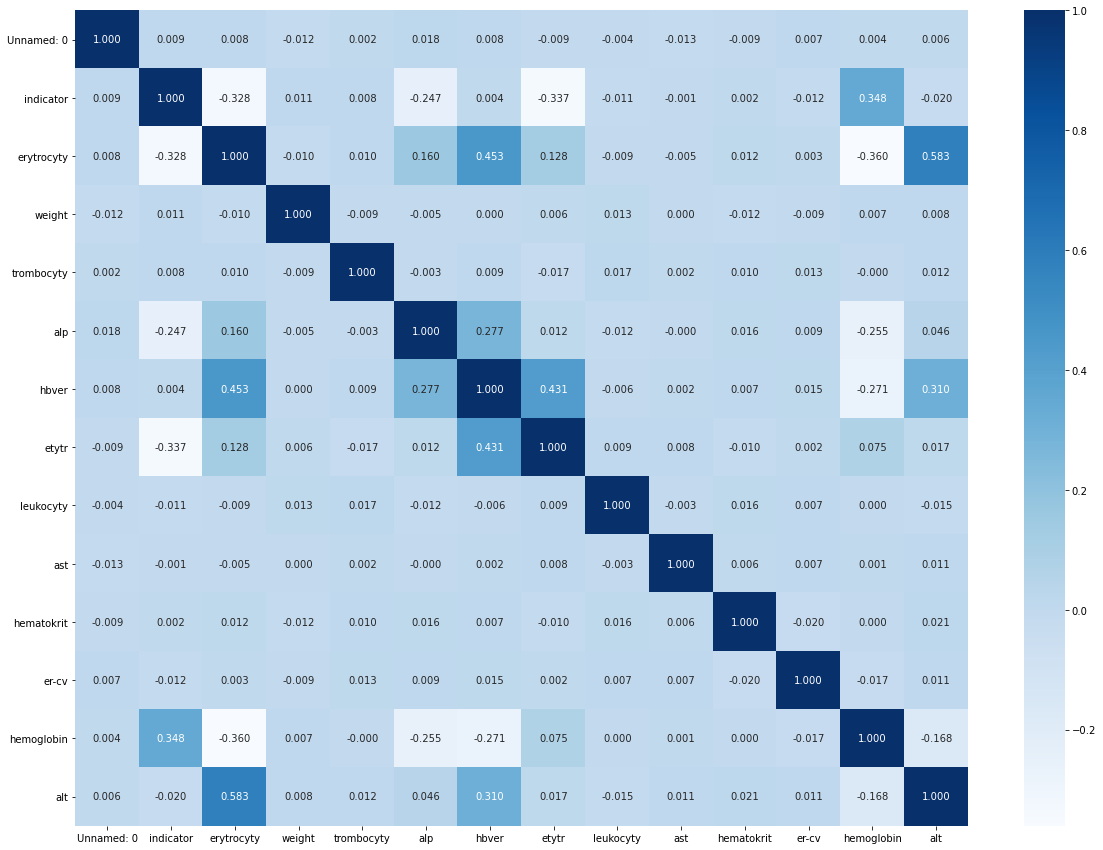

In [31]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_labor.corr(), ax = ax, annot = True, fmt = ".3f", cmap="Blues")

Pre lepšiu ukážku korelácii sme si ich vizualizovali pomocou heatmapy, čím ďalej je číslo od nuly (čím tmavšia farba v heatmape), tým silnejšia je korelácia = viac na sebe atribúty závisia.

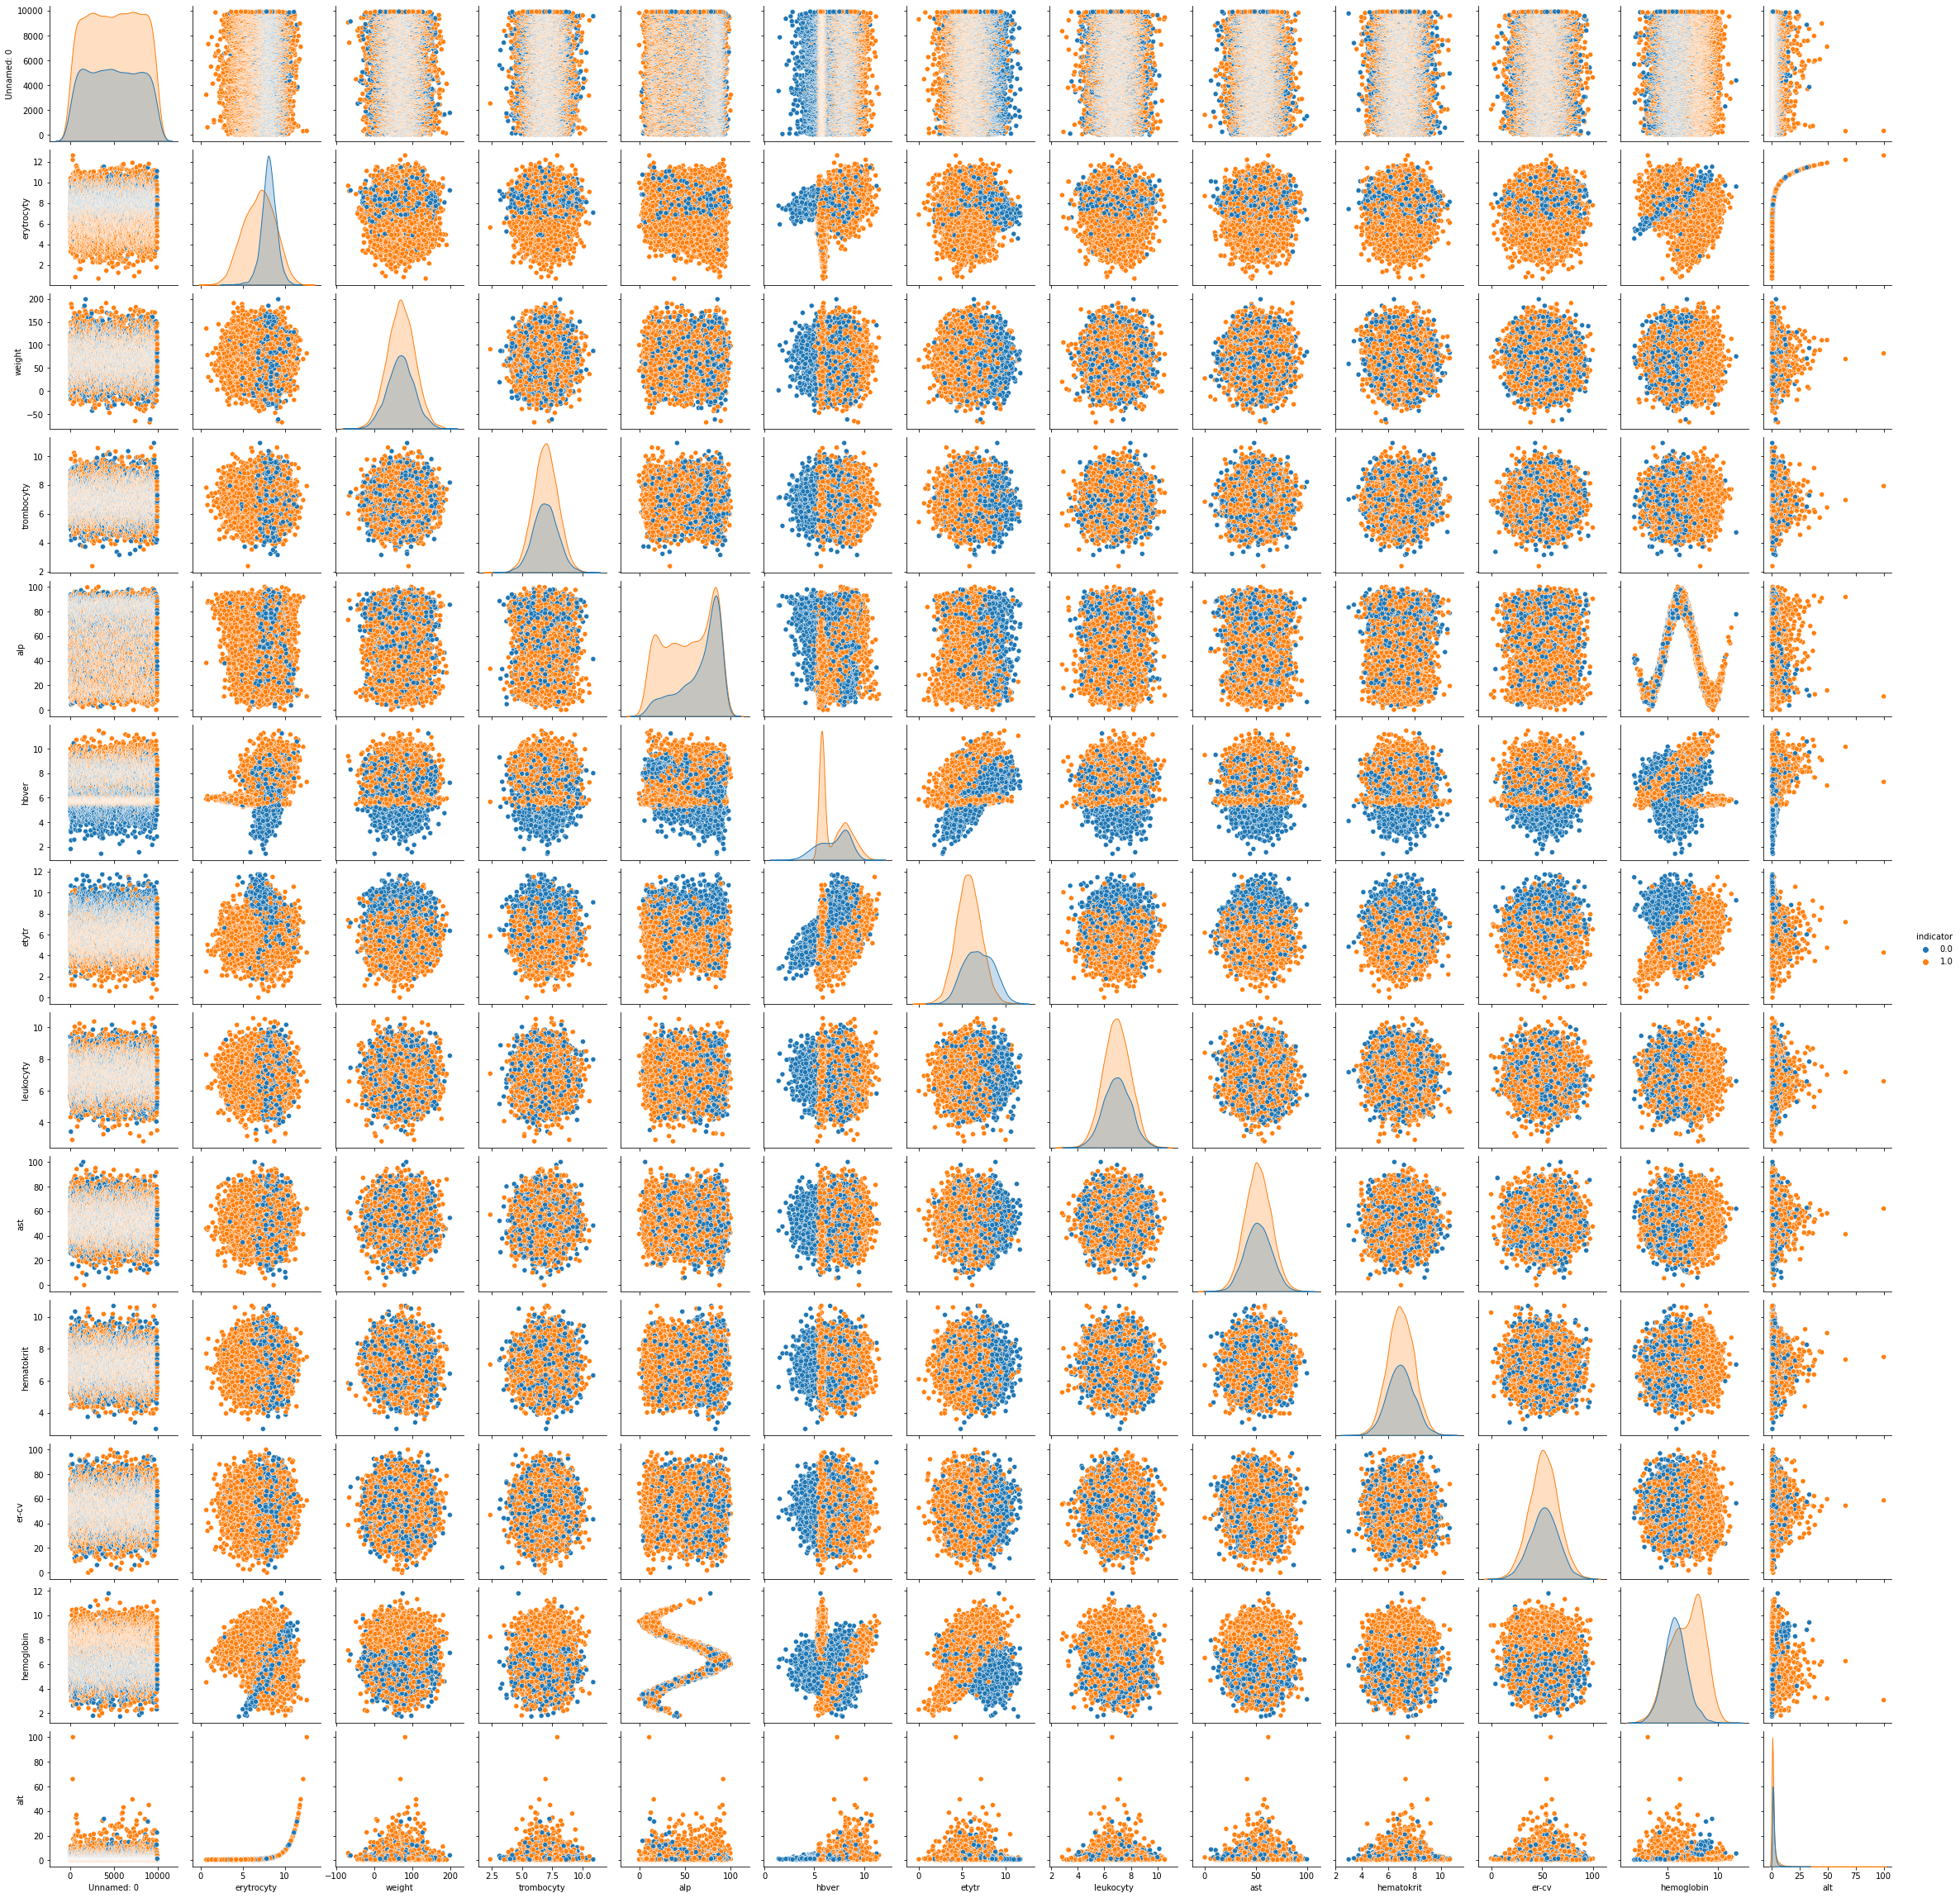

In [32]:
sns.pairplot(df_labor, hue = "indicator")

Pre ešte prehľadnejšie zobrazenie korelácií sme použili pairplot. Ako môžeme vidieť alt a erytrocyty spolu viditeľne korelujú

In [33]:
# distribúcia
seaborn.displot(x = "erytrocyty", hue = "indicator", binwidth=0.1, data = df_labor)
seaborn.displot(x = "weight", hue = "indicator", binwidth=3, data = df_labor)
seaborn.displot(x = "trombocyty", hue = "indicator", binwidth=0.1, data = df_labor)
seaborn.displot(x = "leukocyty", hue = "indicator", binwidth=0.1, data = df_labor)
seaborn.displot(x = "hematokrit", hue = "indicator", binwidth=0.1, data = df_labor)
seaborn.displot(x = "hemoglobin", hue = "indicator", binwidth=0.1, data = df_labor)

# Vďaka rozdeleniu podľa indikátora vieme z grafu vyčítať, ktoré atribúty súvisia s chorobou

# TODO: Identifikácia problémov v dátach s navrhnutým riešením

### OPRAVY ###

# premenovať prvý stĺpec Unnamed: 0 na id pacienta
df = df.rename(columns={"Unnamed: 0": "patient_id"})

# divoced namiesto divorced v tabulke
df.relationship = df.relationship.replace({"divoced": "divorced"})

# Stĺpec smoker má hodnoty yes/no/Y/N .. upravíme to na 1/0
# pandas.unique(df.smoker)
df.smoker = df.smoker.replace({"Y": 1, "N": 0, "yes": 1, "no": 0})

NameError: name 'seaborn' is not defined

In [ ]:
### DUPLIKÁTY ###
# Pozrieme sa, či nemáme v dátach duplicitné záznamy .. skontrolujeme to nad všetkými stĺpcami
# okrem patient_id, keďže číslo záznamu je vždy jedinečné
print(df.drop('patient_id', axis=1).duplicated().any())
#true

# V dátach máme duplikáty, zbavíme sa ich
print("Pocet zaznamov s duplikatmi: " + str(df.shape[0]))
df = df.drop_duplicates(subset=df.drop('patient_id', axis=1).columns)
print("Pocet zaznamov bez duplikatov: " + str(df.shape[0]))


In [ ]:
### CHÝBAJÚCE DÁTA ###
# skontrolujeme, v ktorých stĺpcoch chýba koľko dát
print(df.isnull().sum())

# nie je to veľké množstvo, takže môžeme tieto dáta aj zanedbať, zbaviť sa ich
df = df.dropna(axis=0, how='any')
print(df.isnull().sum())

In [ ]:
### ODCHÝLENÉ HODNOTY ###